##  Deep Neural Networks Project

In this project, you will be working with a real-world data set from the Las Vegas Metropolitan Police Department. The dataset  contains information about the reported incidents, including the time and location of the crime, type of incident, and number of persons involved. 

The dataset is downloaded from the public docket at: 
https://opendata-lvmpd.hub.arcgis.com

let's read the csv file and transform the data:

In [1]:
import torch
import pandas as pd
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
orig_df = pd.read_csv(r"C:\Users\RebeccaHJCui\457\LVMPD-Stats.csv", parse_dates=['ReportedOn'])
a = orig_df.values.shape
b = orig_df.head()

print(a)
print(b)

(275, 15)
            X          Y  OBJECTID     Event_Number                ReportedOn  \
0 -115.087518  36.216702       752  LLV220700058852 2022-07-15 15:30:00+00:00   
1 -115.240172  36.189693       883  LLV220100080186 2022-01-20 21:53:00+00:00   
2 -115.143088  36.181329      2403  LLV230500150901 2023-05-30 15:46:24+00:00   
3 -115.225014  36.117633      4326  LLV230800061061 2023-08-17 14:42:00+00:00   
4 -115.176708  36.095967      6189  LLV230600133216 2023-06-29 10:18:51+00:00   

                      Location                   CSZ Area_Command Beat  \
0    3900 Block E CHEYENNE AVE  Las Vegas, NV  89115         NEAC   F3   
1     1600 Block CRISP PEAR CT  Las Vegas, NV  89108          BAC   U1   
2              1000 Block A St  LAS VEGAS, NV  89106         DTAC   B1   
3            3925 S Jones Blvd  LAS VEGAS, NV  89103         SVAC   P1   
4  3900 Block S LAS VEGAS BLVD  LAS VEGAS, NV  89109         CCAC   M4   

  OffenseGroup NIBRSOffenseCode  VictimCount   Longitude  

In [3]:
df = pd.read_csv(r"C:\Users\RebeccaHJCui\457\LVMPD-Stats.csv", parse_dates=['ReportedOn'],
                 usecols = ['X', 'Y', 'ReportedOn',
                            'Area_Command','NIBRSOffenseCode',
                            'VictimCount' ] )

df['DayOfWeek'] = df['ReportedOn'].dt.day_name()
df['Time' ]     = df['ReportedOn'].dt.hour
df.drop(columns = 'ReportedOn', inplace=True)

In [4]:

df['X'] = df['X'] 
df['Y'] = df['Y'] 
df['Time'] = pd.factorize(df['Time'])[0]
df['DayOfWeek'] = pd.factorize(df['DayOfWeek'])[0]
df.Area_Command = pd.factorize(df['Area_Command'])[0]
df.VictimCount = pd.factorize(df['VictimCount'])[0]
df.NIBRSOffenseCode = pd.factorize(df['NIBRSOffenseCode'])[0]
df.dropna(inplace=True)

In [5]:
df= df[['X', 'Y', 'Area_Command', 'NIBRSOffenseCode',
       'DayOfWeek', 'Time','VictimCount']]

In [6]:
df.values.shape

(275, 7)

# Goal
The goal is to build a predictive model that is trained on the following data:
* latitude and longitude (location)
* Hour of the day
* Day of the week
* Area-of-command code: The police designation of the bureau of the operation.
* Classification code for the crime committed
  
The predicted variable is the number of persons involved in the accident.


## Task 1
* print a few rows of the values in the dataframe ``df`` and explain what each column of data means. 

    X,Y:locatio Coordinate
    NIBRS Offense Code: they are two categories of offenses reported in the NIBRS( Group A and Group B).
    Daysofweek: The day that the crime person commit the crime
    time: the # of time gthat crime person commited the particular crime
    victimcount: how many victims were involved during the crime
    
* identify the input and target variables

     input: other variables
     target: victimcount
     
* what is the range of values in each column? Do you need to scale, shift or normalize your data? 

    I am assuming we do not need to normalize the data.


In [7]:
df.head()
df.VictimCount.value_counts()

VictimCount
0    142
1    100
3     21
2      9
4      1
5      1
6      1
Name: count, dtype: int64

## Task 2 

* Create two `DataLoader` objects for training and testing based on the input and output variables. Pick a reasonable batch size and verify the shape of data by iterating over the one dataset and printing the shape of the batched data. 

In [8]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# assign x and y
my_x = df[['X','Y','Area_Command','NIBRSOffenseCode','DayOfWeek','Time']].values
my_y = df["VictimCount"].values
print(my_x)
print(my_y)

# transform to torch tensor
tensor_x = torch.Tensor(my_x) 
tensor_y = torch.Tensor(my_y)

# train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(tensor_x, tensor_y, train_size=0.7, shuffle=True)
#my_dataset = TensorDataset(tensor_x,tensor_y) # create dataset

# creating train set & test set
my_train_set = TensorDataset(X_train,y_train) 
my_test_set = TensorDataset(X_test,y_test) 

batch_size = 100
n_iters = 100

num_epochs = n_iters / (len(my_train_set) / batch_size)
num_epochs = int(np.ceil(num_epochs))

num_epochs1 = n_iters / (len(my_test_set) / batch_size)
num_epochs1 = int(np.ceil(num_epochs1))

my_train_dataloader = DataLoader(my_train_set, batch_size=batch_size) # create train dataloader
my_test_dataloader = DataLoader(my_test_set, batch_size=batch_size ) # create test dataloader


[[-115.087518     36.216702      0.            0.            0.
     0.        ]
 [-115.2401715    36.189693      1.            1.            1.
     1.        ]
 [-115.14308839   36.18132889    2.            1.            2.
     0.        ]
 ...
 [-115.172073     36.123012      4.            1.            1.
    16.        ]
 [-115.1525926    36.06607317    5.            1.            6.
    23.        ]
 [-115.06034452   36.13729563    9.            1.            6.
    13.        ]]
[0 0 1 2 0 1 2 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1
 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 3
 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 2 0 1 0 0 0
 0 0 3 0 1 1 0 0 1 0 1 3 2 0 0 3 1 0 3 1 1 0 1 0 1 1 1 0 1 1 0 2 1 4 3 1 0
 1 0 0 1 1 1 0 0 0 3 1 0 1 0 1 2 1 0 1 0 0 0 1 0 0 3 0 3 3 0 1 1 1 0 3 3 1
 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 3 1 0 0 1 0 0 0 1 0 0 3 0 3 0 0 3 3 1 3 3 1
 3 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 2 2 0 1 0 5 1 1 1 0

## Task 3
In this task you will try to predict number of crime victims as a **real number**. Therefore the machine learning problem is a **regression** problem. 

* Define the proper loss function for this task

  Since its regression problem, I will use MSE
   
* What should the size of the predicted output be?  

  The size of output should be 1
  
* Explain your choice of architecture, including how many layers you will be using

  To be simplistic, I will choose 3 layers in total(e.g., input, hidden, output).
  my input size is 6 since I have 6 variables. Then I choose 12 to be the size of my hidden layer.
  12 is just an arbitrary number I choose. My thought was that since I have 6 inputs, then I just double the input size in my hidden layer. 
  And my output size is 1 since I am predicting the number of victims regarless what that number would be.
  
      
* define an optimizer for training this model, choose a proper learning rate 

   For this task, I would to choose a learning rate that is in the middle like 0.01
   
   
* write a training loop that obtains a batch out of the  training data and calculates the forward and backward passes over the neural network. Call the optimizer to update the weights of the neural network.
* write a for loop that continues the training over a number of epochs. At the end of each epoch, calculate the ``MSE`` error on the test data and print it.
* is your model training well? Adjust the learning rate, hidden size of the network, and try different activation functions and number of layers to achieve the best accuracy and report it. 


In [9]:
import torch.nn as nn
class model(nn.Module): 

    def __init__(self, input_dim, output_dim): 
        super(model, self).__init__() 
        
        # activation function
        self.activation = nn.Sigmoid() # relu nn.ReLU()
        
        # Input Layer
        self.l1 = nn.Linear(input_dim, 12) 
        
        # Hidden Layer 
        self.l2 = nn.Linear(12, 12) 

        # Output Layer 
        self.l3 = nn.Linear(12, output_dim)
        
    def forward(self, x):
        h1  = self.activation(self.l1(x))
        h2  = self.activation(self.l2(h1))
        out = self.l3(h2)
        return out
# instantiate the model for later use
my_model = model(6,1)

In [10]:
# define loss and optimizer
import torch.optim as optim 
from torch.optim import Adam 
loss_f = nn.MSELoss()  # mean square error
optimizer = Adam(my_model.parameters(), lr=0.01)

In [11]:
# training loop
for epoch in range(num_epochs):
    for i in my_train_dataloader:
        inputs, outputs = i
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward pass
        y_pred = my_model(inputs)
        # calculate loss
        loss = loss_f(y_pred, outputs)
        # backward pass
        loss.backward()
        # update weights
        optimizer.step()



C:\Users\RebeccaHJCui\anaconda3\envs\AI\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\RebeccaHJCui\anaconda3\envs\AI\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([92])) that is different to the input size (torch.Size([92, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [12]:
lossTotall =0
count =0 
for i in my_test_dataloader:
    inputs, outputs = i
    # forward pass
    y_pred = my_model(inputs)
    # calculate loss
    loss = loss_f(y_pred, outputs)
    lossTotall = lossTotall +loss
    count= count + 1 
print(lossTotall)
print( lossTotall/count) # divide by count to get average loss here

tensor(1.2713, grad_fn=<AddBackward0>)
tensor(1.2713, grad_fn=<DivBackward0>)


C:\Users\RebeccaHJCui\anaconda3\envs\AI\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([83])) that is different to the input size (torch.Size([83, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## Task 4 

In this task, you will try to predict the number of crime victims as a **class number**. Therefore the machine learning problem is a **classification** problem. 

* Repeat all the steps in task 3. Specifically, pay attention to the differences with regression.
* How would you find the number of classes on the output data?

  There are total of 7 different outputs( 0-6)

* How is the architecture different?

   The architecture here is slightly differnt since the activation function is tengent. In forward network, there is an activation function applied to the output layer. The hidden layers are about 200.
   
* How is the loss function different?

  Sincer its classification, I choose cross-entropy to be the loss function.
  
* Calculate the Accuracy for test data as the number of correct classified outputs divided by the total number of test data in each epoch. Report it at the end of each epoch
* Try a few variations of learning rate, hidden dimensions, layers, etc. What is the best accuracy that you can get? 

In [13]:
class model_2(nn.Module): 

    def __init__(self, input_dim, output_dim): 
        super(model_2, self).__init__() 
        
        # activation function
        self.activation = nn.Tanh()
        
        # Input Layer
        self.l1 = nn.Linear(input_dim, 200) 
        
        # Hidden Layer 
        self.l2 = nn.Linear(200, 200) 

        # Output Layer 
        self.l3 = nn.Linear(200, output_dim)
        
    def forward(self, x):
        h1  = self.activation(self.l1(x))
        h2  = self.activation(self.l2(h1))
        out = torch.sigmoid(self.l3(h2))
        return out
    
my_model_2 = model_2(6,7)


In [14]:
import torch.optim as optim 
from torch.optim import Adam

loss_f2 = nn.CrossEntropyLoss()
optimizer = Adam(my_model_2.parameters(), lr=0.01)

In [15]:
# training loop
for epoch in range(100):
    for i in my_train_dataloader:
        inputs, outputs = i
        outputs = outputs.long() # convert float to int/long # here
        
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward pass
        y_pred = my_model_2(inputs)
#         print(inputs.shape, y_pred.shape, outputs.shape)
        # calculate loss
        loss = loss_f2(y_pred, outputs)
        # backward pass
        loss.backward()
        print(loss)
        
        # update weights
        optimizer.step()

tensor(1.9109, grad_fn=<NllLossBackward0>)
tensor(1.5522, grad_fn=<NllLossBackward0>)
tensor(1.4769, grad_fn=<NllLossBackward0>)
tensor(1.4940, grad_fn=<NllLossBackward0>)
tensor(1.4511, grad_fn=<NllLossBackward0>)
tensor(1.4881, grad_fn=<NllLossBackward0>)
tensor(1.4470, grad_fn=<NllLossBackward0>)
tensor(1.4872, grad_fn=<NllLossBackward0>)
tensor(1.4460, grad_fn=<NllLossBackward0>)
tensor(1.4869, grad_fn=<NllLossBackward0>)
tensor(1.4457, grad_fn=<NllLossBackward0>)
tensor(1.4868, grad_fn=<NllLossBackward0>)
tensor(1.4455, grad_fn=<NllLossBackward0>)
tensor(1.4867, grad_fn=<NllLossBackward0>)
tensor(1.4454, grad_fn=<NllLossBackward0>)
tensor(1.4867, grad_fn=<NllLossBackward0>)
tensor(1.4454, grad_fn=<NllLossBackward0>)
tensor(1.4867, grad_fn=<NllLossBackward0>)
tensor(1.4454, grad_fn=<NllLossBackward0>)
tensor(1.4867, grad_fn=<NllLossBackward0>)
tensor(1.4454, grad_fn=<NllLossBackward0>)
tensor(1.4867, grad_fn=<NllLossBackward0>)
tensor(1.4454, grad_fn=<NllLossBackward0>)
tensor(1.48

In [16]:
 # Testing loop
correct = 0
total = 0

with torch.no_grad(): 
    for t in my_test_dataloader: 
        x, y = t 
        y_pred = my_model_2(x) 
        _, predicted = torch.max(y_pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum()
    accuracy = 100 * correct / total
            
    # Print Loss
    print(accuracy)

tensor(51.8072)


In [17]:
my_model_2(x)

tensor([[9.9999e-01, 9.9998e-01, 1.4798e-06, 2.6818e-05, 1.0494e-06, 9.9647e-07,
         1.0620e-06],
        [9.9999e-01, 9.9998e-01, 1.4799e-06, 2.6817e-05, 1.0493e-06, 9.9656e-07,
         1.0620e-06],
        [9.9999e-01, 9.9998e-01, 1.4730e-06, 2.6742e-05, 1.0543e-06, 1.0035e-06,
         1.0700e-06],
        [9.9999e-01, 9.9998e-01, 1.4731e-06, 2.6711e-05, 1.0545e-06, 1.0062e-06,
         1.0724e-06],
        [9.9999e-01, 9.9998e-01, 1.4753e-06, 2.6747e-05, 1.0528e-06, 1.0029e-06,
         1.0689e-06],
        [9.9999e-01, 9.9998e-01, 1.4738e-06, 2.6727e-05, 1.0539e-06, 1.0047e-06,
         1.0709e-06],
        [9.9999e-01, 9.9998e-01, 1.4797e-06, 2.6850e-05, 1.0491e-06, 9.9361e-07,
         1.0595e-06],
        [9.9999e-01, 9.9998e-01, 1.4793e-06, 2.6857e-05, 1.0492e-06, 9.9297e-07,
         1.0591e-06],
        [9.9999e-01, 9.9998e-01, 1.4730e-06, 2.6706e-05, 1.0546e-06, 1.0066e-06,
         1.0727e-06],
        [9.9999e-01, 9.9998e-01, 1.4730e-06, 2.6707e-05, 1.0546e-06, 1.00

In [18]:
predicted,y,y_pred.data

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 3., 1., 0., 3., 1., 1.,
         0., 1., 0., 1., 0., 0., 0., 1., 0., 5., 0., 0., 1., 0., 0., 1., 0., 0.,
         6., 0., 1., 0., 0., 1., 0., 2., 0., 0., 1., 0., 0., 3., 0., 1., 3., 0.,
         0., 0., 0., 1., 0., 3., 0., 0., 0., 1., 1., 2., 1., 1., 0., 1., 0., 0.,
         0., 1., 0., 1., 1., 3., 1., 0., 0., 0., 1.]),
 tensor([[9.9999e-01, 9.9998e-01, 1.4798e-06, 2.6818e-05, 1.0494e-06, 9.9647e-07,
          1.0620e-06],
         [9.9999e-01, 9.9998e-01, 1.4799e-06, 2.6817e-05, 1.0493e-06, 9.9656e-07,
          1.0620e-06],
         [9.9999e-01, 9.9998e-01, 1.4730e-06, 2.6742e-05, 1.0543e-06, 1.0035e-06,
          1.0700e-06],
         [9.9999e-0

## Task 5

### Reflect on your results

* Write a paragraph about your experience with tasks 3 and 4. How do you compare the results? Which one worked better? Why?
* Write a piece of code that finds an example of a  miss-classification. Calculate the probabilities for the output classes and plot them in a bar chart. Also, indicate what is the correct class label.

In task 3, we are viewing the task as a regression problem. In task 4, we are viewing the task as a classification problem. If we consider the dataset and see our goal, which is to predict the number of victims, this problem should be treated as a classification problem. Thus, task 4 works better. This is because classification model would produce discrete class labels(e.g, the exact number of victims) rather predict something in between two probabilities. 
However. I faced some roadblocks during task 4. All my predictions were either all 0s or all 1s ( depending on different activation function I used ). By exploring the dataset, I observed that most of the cases were either 0 victim or 1 victim. I assumed that my model might be not working for the dataset somehow. 

tensor([9.9999e-01, 9.9998e-01, 1.4799e-06, 2.6817e-05, 1.0493e-06, 9.9656e-07,
        1.0620e-06])
the true label is tensor(1.)


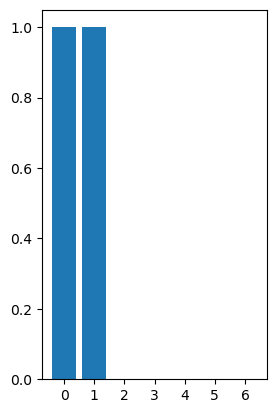

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
idx = 1
x = y_pred[idx].data
print(x)
ax = plt.subplot(121)
ax.bar(range(7), x.data.numpy())
ax.set_xticks(range(7))
y = y[idx].data
print("the true label is", y)

## Task 6: Exploring the patterns in raw data

* Plot the crime incidents as a `scatter` plot using the corrdinates. Use the color property of each datapoint to indicate the day of the week. Is there a pattern in the plot?

   It seems like most crime were commited over the weekend rather than weekday.
   
* Now make a new scatter plot and use the color property of each datapoint to indicate the number of persons involved in the incident. Is there a pattern here?

   It seems like that in most cases, there were no victims.
* use numpy (or pandas if you like) to sort the number of crimes reported by the day of the week. What days are most frequent?

    On weeked, there were more victims.

<Axes: xlabel='X', ylabel='Y'>

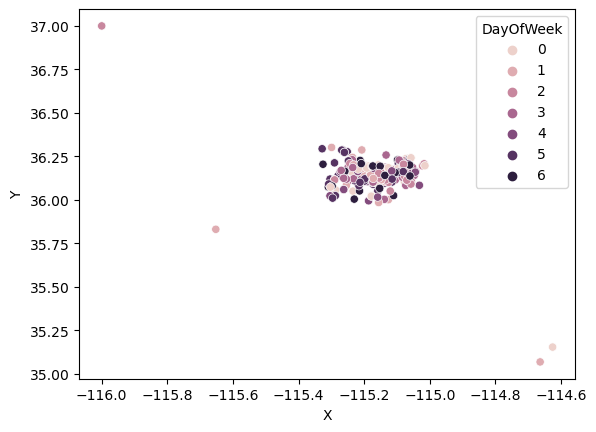

In [20]:
sns.scatterplot(x = "X",
                y = "Y", hue ="DayOfWeek",
               data=df)

<Axes: xlabel='X', ylabel='Y'>

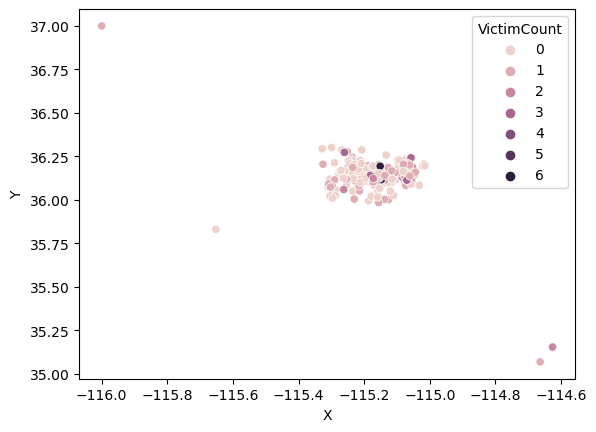

In [21]:
sns.scatterplot(x = "X",
                y = "Y", hue ="VictimCount",
               data=df)

In [22]:
df.sort_values(by=["DayOfWeek","VictimCount"]) 


,X,Y,Area_Command,NIBRSOffenseCode,DayOfWeek,Time,VictimCount
0,-115.087518,36.216702,0,0,0,0,0
10,-115.149847,36.158975,2,0,0,7,0
23,-115.070355,36.230058,0,1,0,12,0
24,-115.162821,36.144180,2,1,0,4,0
32,-115.233921,36.050508,7,1,0,2,0
...,...,...,...,...,...,...,...
225,-115.297673,36.079251,6,1,6,21,1
261,-115.105326,36.156977,2,1,6,20,1
265,-115.136822,36.140819,5,1,6,12,1
274,-115.060345,36.137296,9,1,6,13,1
